In [1]:
import numpy as np
from matplotlib import pyplot as plt

#### **Problem 5**

<font size = 4 color = black face = "Times New Roman">(1)

In [2]:
def sinesum(t,b): # Coefficients bn in array b and time coordinates in array t.
    def f(x):
        n = np.array(range(1, len(b)+1))
        return (b*np.sin(n*x)).sum() # Define the function with the given bn.
    S_N = []
    for x in t: # Use iteration to get the result for each t.
        S_N.append(f(x))
    return S_N

<font size = 4 color = black face = "Times New Roman">(2)

In [5]:
def plot_compare (b, f, N, M): # Here b is also added to pass the values for bn into this function.
    t  =np.linspace(-np.pi, np.pi, M) # Get M uniformly distributed t coordinates.
    f_value = np.array(f(t))
    S_N_value = np.array(sinesum(t, b[:N])) # Take the first N terms in b adn get the value for S_N(t)
    plt.plot(t, f_value, color = 'r')
    plt.plot(t, S_N_value, color = 'b')
    plt.title(r'Plot of $f(t),S_N(t)$ as a function of t')
    plt.xlabel('t')
    plt.ylabel(r'$f(t)/S_N(t)$')
    plt.legend([r'$f(t)$',r'$S_N(t)$'])
    plt.show()

<font size = 4 color = black face = "Times New Roman">(3)

In [7]:
def error(b, f, M):
    t=np.linspace(-np.pi, np.pi, M) # Get M uniformly distributed t coordinates.
    f_value = np.array(f(t))
    S_N_value = np.array(sinesum(t, b)) # Take the first N terms in b adn get the value for S_N(t)
    error = np.sqrt(((f_value - S_N_value)**2).sum()) # Use the formula to calculate the error E.
    return error

<font size = 4 color = black face = "Times New Roman">(4)

In [8]:
def trial(f, N, M):
    print('''Please enter a set of values for b (e.g. 1,2,4 means b1 = 1, b2 = 2, b3 = 4), if you have already finshed 
    your experiment just print 'finsh' to exit.''')
    while True:
        b = input('>')
        if b.lower() == 'finish':
            print('Exit')
            break
        else:
            b = b.split(',')
            a = []
            for i in b:
                a.append(float(i))
            b = a
            plot_compare(b, f, N, M)
            E = error(b, f, M)
            sign = input('Would you like to check your error? ') # Enter 1 if you want check your error.
            if sign == '1':
                print(f'Your error is {E}.')

Please enter a set of values for b (e.g. 1,2,4 means b1 = 1, b2 = 2, b3 = 4), if you have already finshed 
    your experiment just print 'finsh' to exit.


> 0.5,-0.5,1


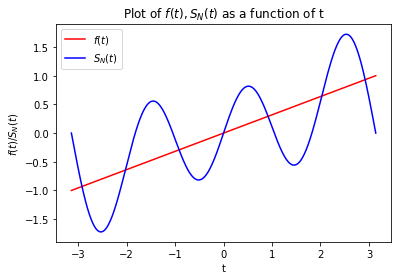

Would you like to check your error?  2
> 0.5,-0.5,0


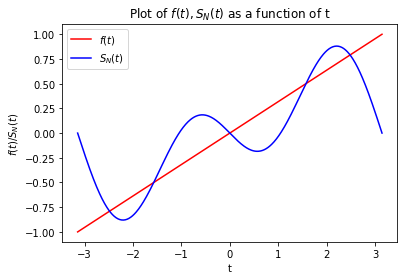

Would you like to check your error?  1


Your error is 7.337303002935104.


> 0.5,-0.35,0.3


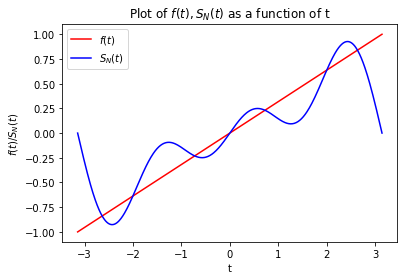

Would you like to check your error?  1


Your error is 6.0448698980101385.


> 0.5,-0.35,0.25


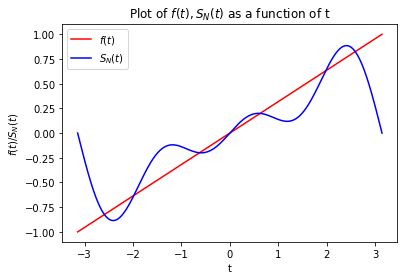

Would you like to check your error?  1


Your error is 5.913808158149892.


> finish


Exit


In [9]:
# Test the function above with M = 500, f(t) = t/pi and N = 3.
M = 500
def f(t):
    return t / np.pi
trial(f, 3, 500)

<font size = 4 color = black face = "Times New Roman">(5)

In [11]:
def get_three_b_values(begin, end, step): 
# Begin and end set the interval, step is the difference between two neighbouring values chosen. (begin < end; step>0)
    b = []
    for b1 in np.arange(begin, end, step):
        for b2 in np.arange(begin, end ,step):
            for b3 in np.arange(begin, end ,step):
                b.append([b1, b2, b3])  
    return b

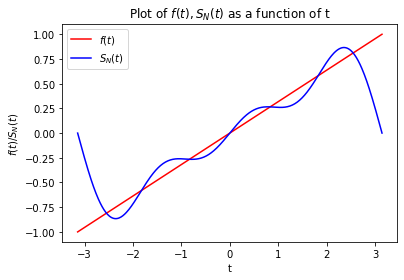

The smallest error is 5.492181424056136


In [14]:
# Still use the test elements in the last problem.
M = 500
N = 3
def f(t):
    return t / np.pi
b_sets = get_three_b_values(-1, 1, 0.1)
E_mini = error(b_sets[0], f, M)
b_best = b_sets[0]
for b in b_sets:
    E = error(b, f, M)
    if E < E_mini:
        E_mini = E
        b_best = b
plot_compare (b_best, f, N, M)
print(f'The smallest error is {E_mini}')